In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS

C:\Users\zopfk\miniconda3\envs\data_literacy\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
construction_cost = pd.read_csv('../data/construction_cost.csv', index_col=0)
income = pd.read_csv('../data/income.csv', index_col=0)
living_space = pd.read_csv('../data/living_space.csv', index_col=0)
rent = pd.read_csv('../data/rent.csv', index_col=0)
population = pd.read_csv('../data/population.csv', index_col=0)

In [3]:
observation = rent.mean(axis=1).values.reshape(-1 ,1)

start with all features

In [14]:
def compute_regression(feature_names):

    features_list = []

    if 'material cost' in feature_names:
        mc_features = construction_cost['material cost'].values.reshape(-1, 1)
        features_list.append(mc_features)
    if 'labor cost' in feature_names:
        lc_features = construction_cost['labor cost'].values.reshape(-1, 1)
        features_list.append(lc_features)
    if 'living space' in feature_names:
        ls_features = living_space['Insgesamt'].values.reshape(-1, 1)
        features_list.append(ls_features)
    if 'population' in feature_names:
        pop_features = population['total'].values.reshape(-1, 1)
        features_list.append(pop_features)

    features = np.hstack(features_list)

    fit = OLS(observation, features).fit()
    prediction = fit.predict(features)
    summary = fit.summary()

    coefs = fit.params
    p_values = fit.pvalues
    aic = fit.aic

    plt.figure(figsize=(7, 5))
    y = np.arange(1, len(feature_names)+1, 1)
    plt.scatter(coefs, y, s=20, color='darkred')
    plt.yticks(y, labels=feature_names)
    plt.vlines(0, 0, 4, color='pink')
    plt.xlabel('regression coefficients')
    plt.show();

    plt.figure(figsize=(7, 5))
    plt.plot(observation, color='darkred', label='observation')
    plt.plot(prediction, color='blue', label='prediction')
    plt.xlabel('year')
    plt.show();

    return p_values, aic, summary

C:\Users\zopfk\miniconda3\envs\data_literacy\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


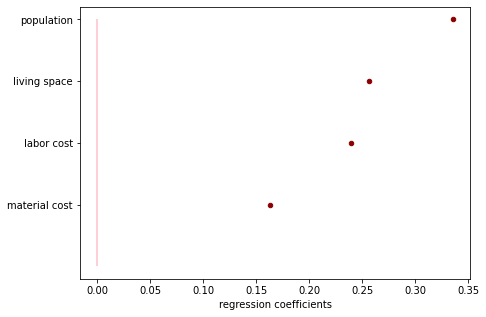

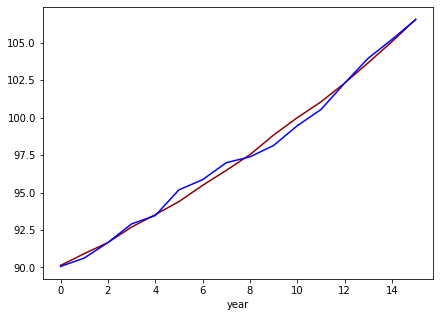

P-values per coefficient:  [4.53716456e-02 3.06941658e-05 2.71321506e-02 2.87655619e-05]
AIC:  22.608594740128435


In [16]:
feature_names = ['material cost', 'labor cost', 'living space', 'population']
p_values, aic, summary = compute_regression(feature_names)
print('P-values per coefficient: ', p_values)
print('AIC: ', aic)
#print(summary)

C:\Users\zopfk\miniconda3\envs\data_literacy\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


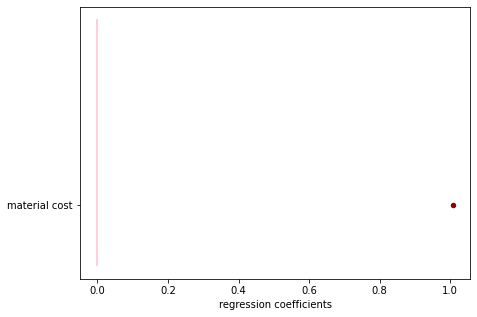

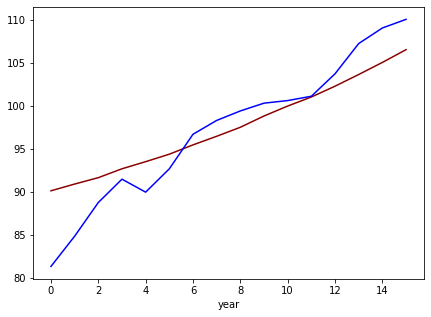

P-values per coefficient:  [4.00224951e-23]
AIC:  87.39388841181355


In [17]:
feature_names = ['material cost']
p_values, aic, summary = compute_regression(feature_names)
print('P-values per coefficient: ', p_values)
print('AIC: ', aic)
#print(summary)

C:\Users\zopfk\miniconda3\envs\data_literacy\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


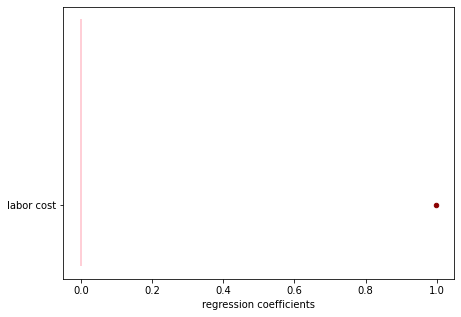

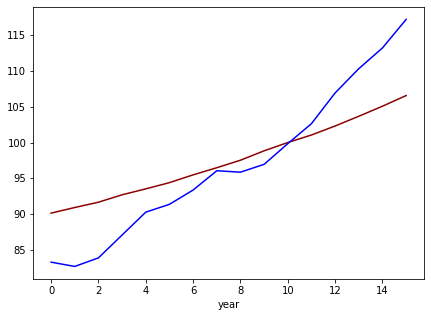

P-values per coefficient:  [3.81680888e-20]
AIC:  102.02742288128039


In [18]:
feature_names = ['labor cost']
p_values, aic, summary = compute_regression(feature_names)
print('P-values per coefficient: ', p_values)
print('AIC: ', aic)
#print(summary)

In [ ]:
ls_f

C:\Users\zopfk\miniconda3\envs\data_literacy\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


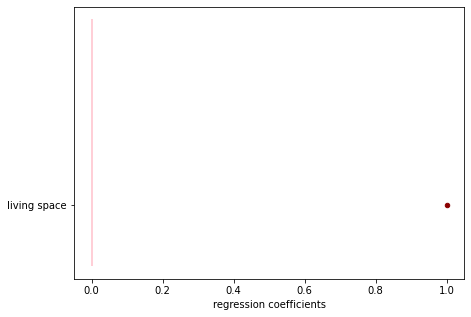

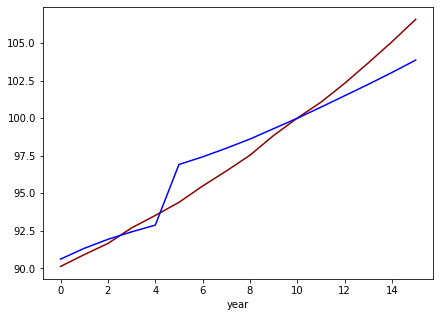

P-values per coefficient:  [2.58023882e-29]
AIC:  56.98534259493353


In [19]:
feature_names = ['living space']
p_values, aic, summary = compute_regression(feature_names)
print('P-values per coefficient: ', p_values)
print('AIC: ', aic)
#print(summary)

C:\Users\zopfk\miniconda3\envs\data_literacy\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


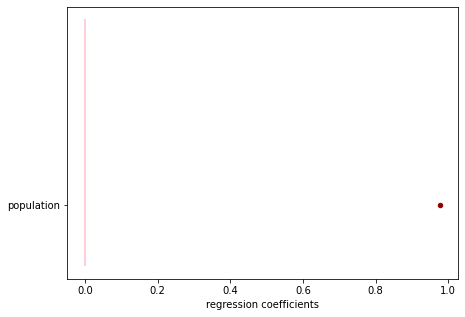

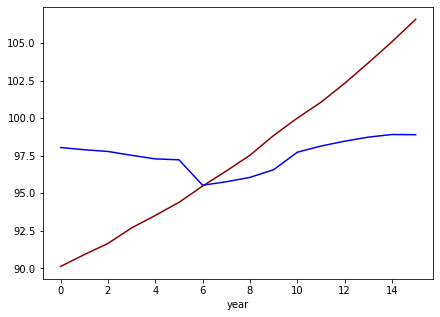

P-values per coefficient:  [3.39858417e-21]
AIC:  96.86848421958712


In [20]:
feature_names = ['population']
p_values, aic, summary = compute_regression(feature_names)
print('P-values per coefficient: ', p_values)
print('AIC: ', aic)
#print(summary)

C:\Users\zopfk\miniconda3\envs\data_literacy\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


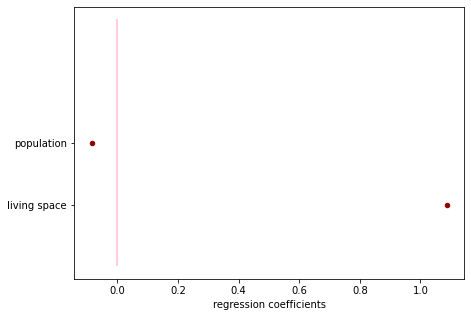

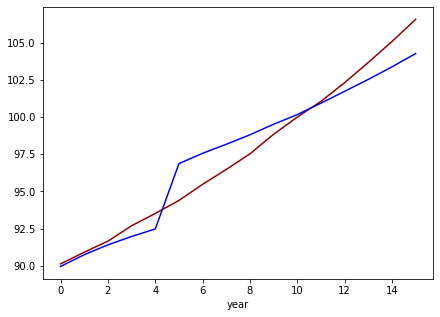

P-values per coefficient:  [3.41419759e-09 3.17288271e-01]
AIC:  57.801128005553096


In [23]:
feature_names = ['living space', 'population']
p_values, aic, summary = compute_regression(feature_names)
print('P-values per coefficient: ', p_values)
print('AIC: ', aic)

In [ ]:
#TODO: compute living space per population: use that as feature